In [14]:
#Bank Marketing Data Set

#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as prep
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

#Importing the dataset

initial_df = pd.read_csv('/content/sample_data/DSA Data Set.csv')


#Number of rows and columns in the data frame
initial_df.shape

df= initial_df.drop('ModelPrediction',axis=1,errors='ignore')

y_values ={'yes' : 1, 'no' : 0}
df['y'] = df['y'].map(lambda x: y_values[x]).astype(object)

#type of variables in the dataset

CategoricalDataCol=df.select_dtypes(include='object').columns

print(CategoricalDataCol) 


ContinousDataCol=df.select_dtypes(include=np.number).columns

print(ContinousDataCol) 


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


0    36548
1     4640
Name: y, dtype: int64


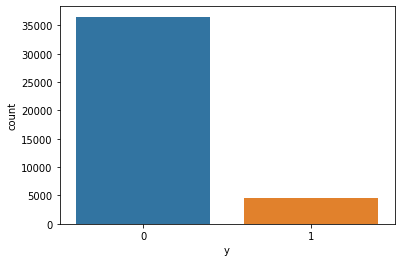

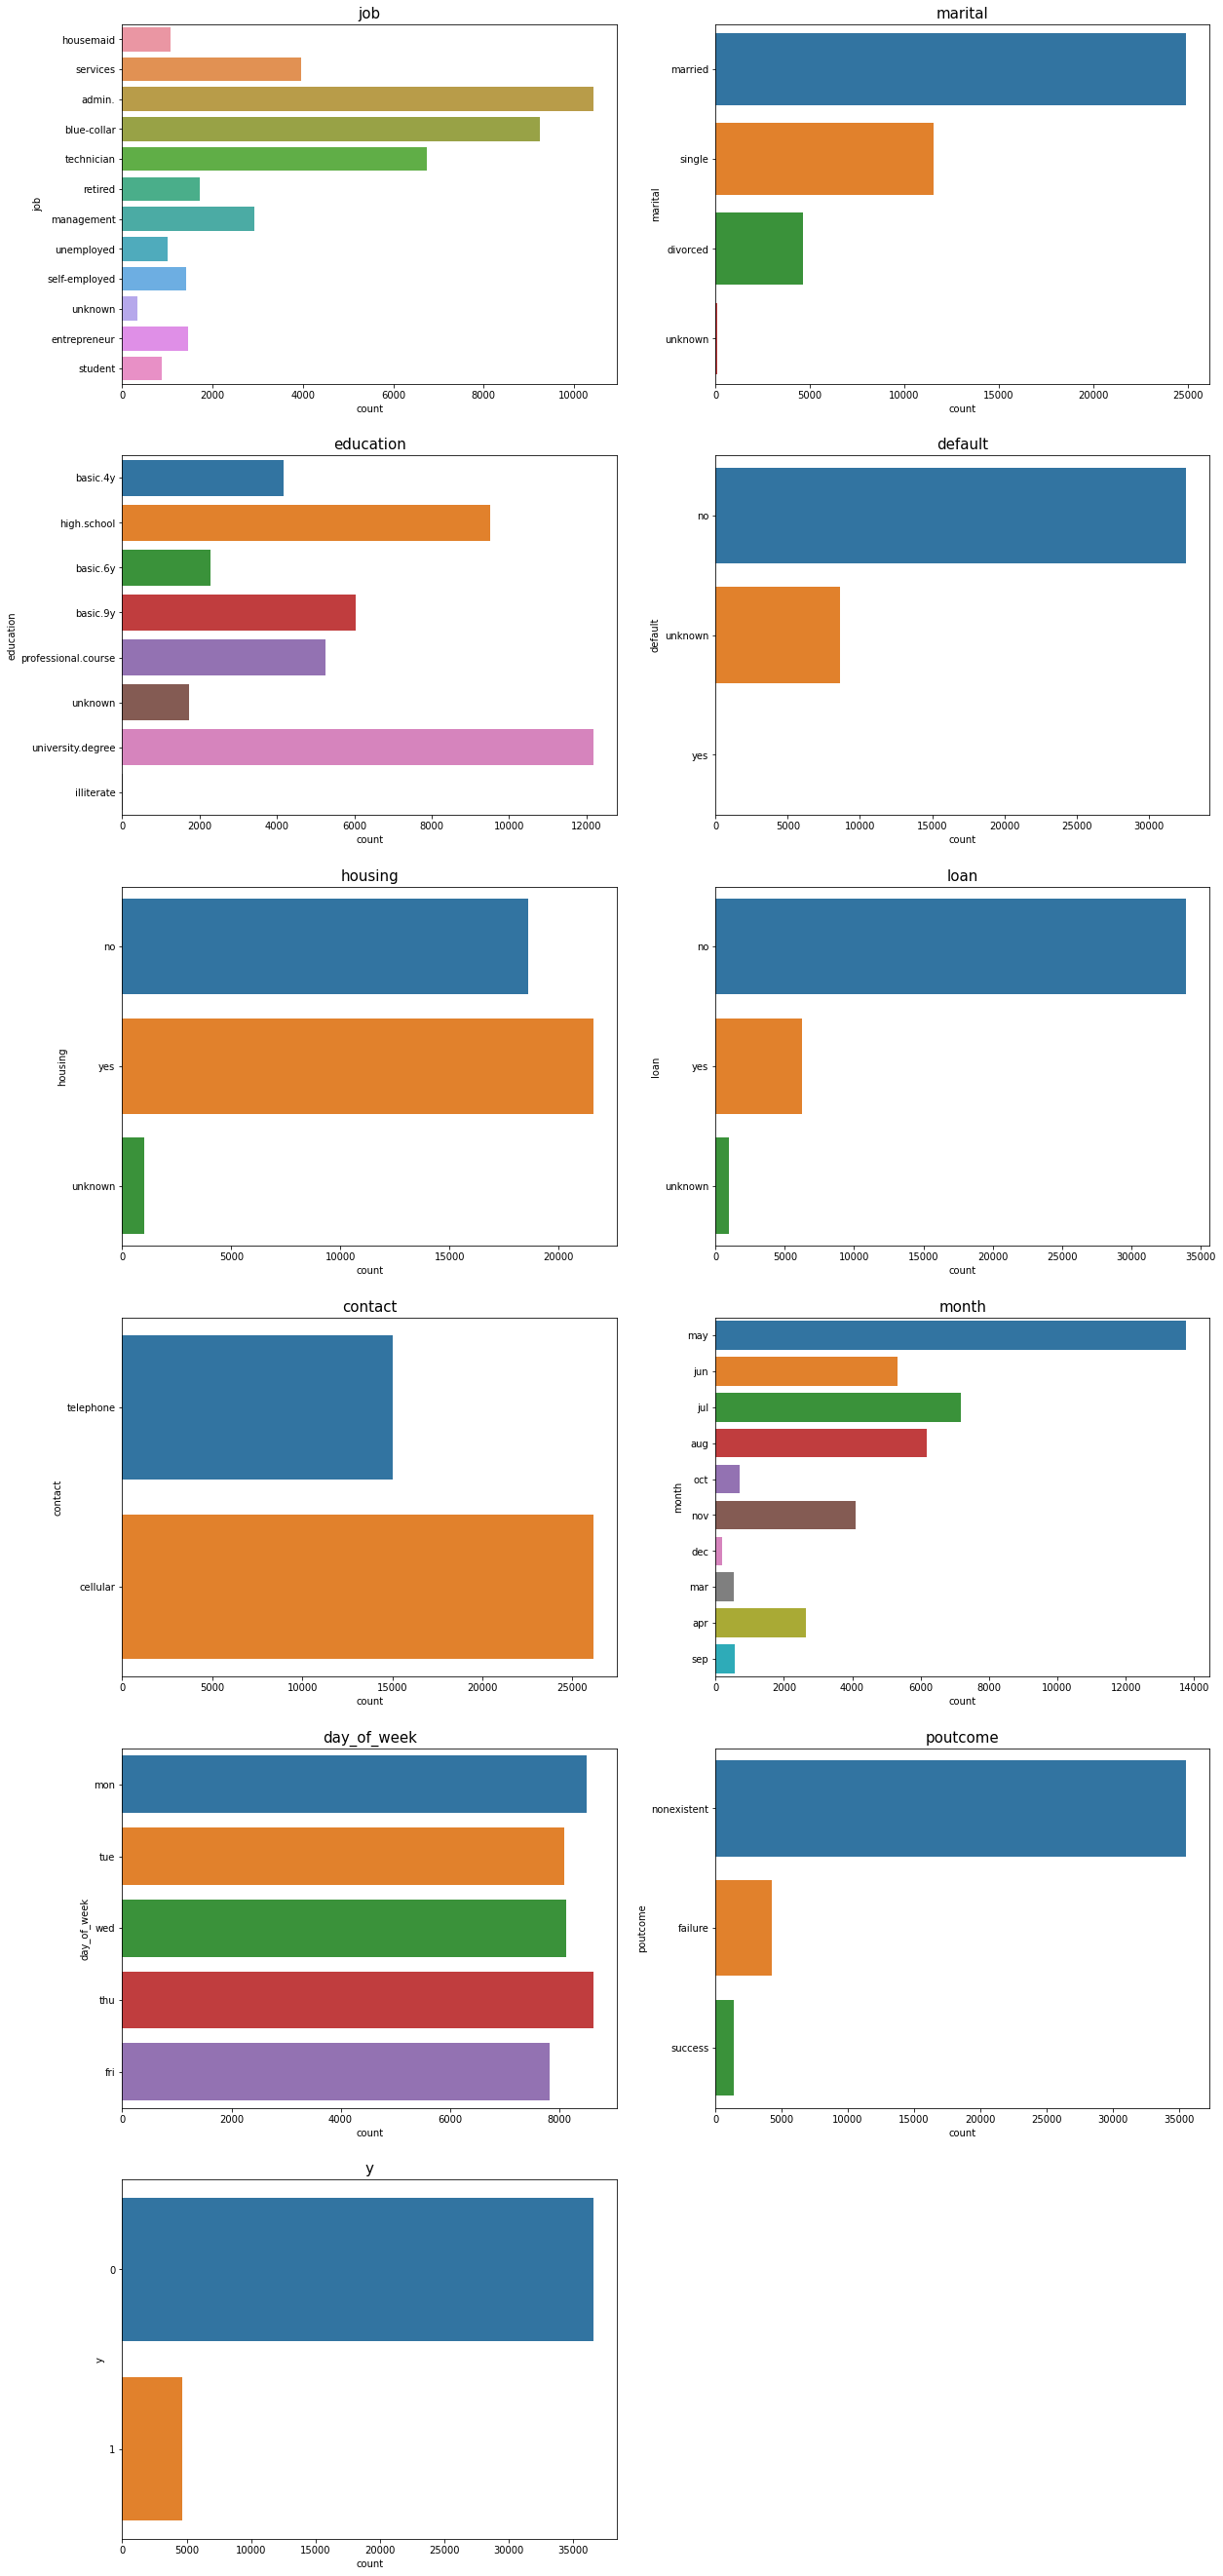

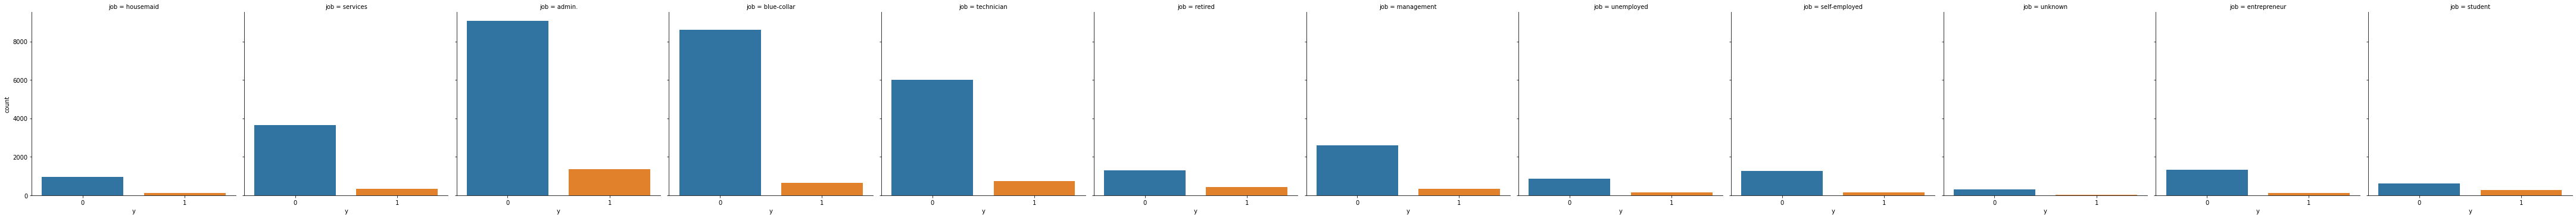

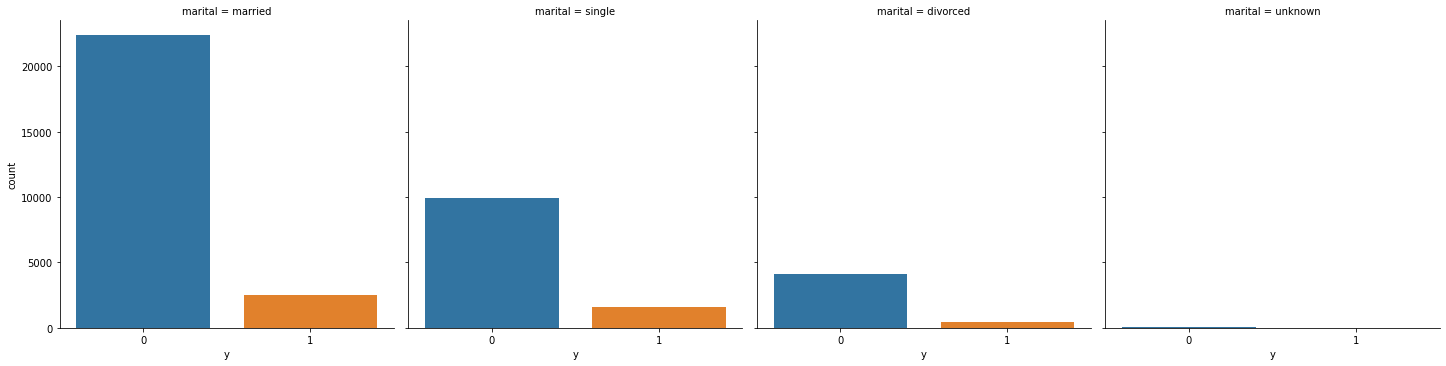

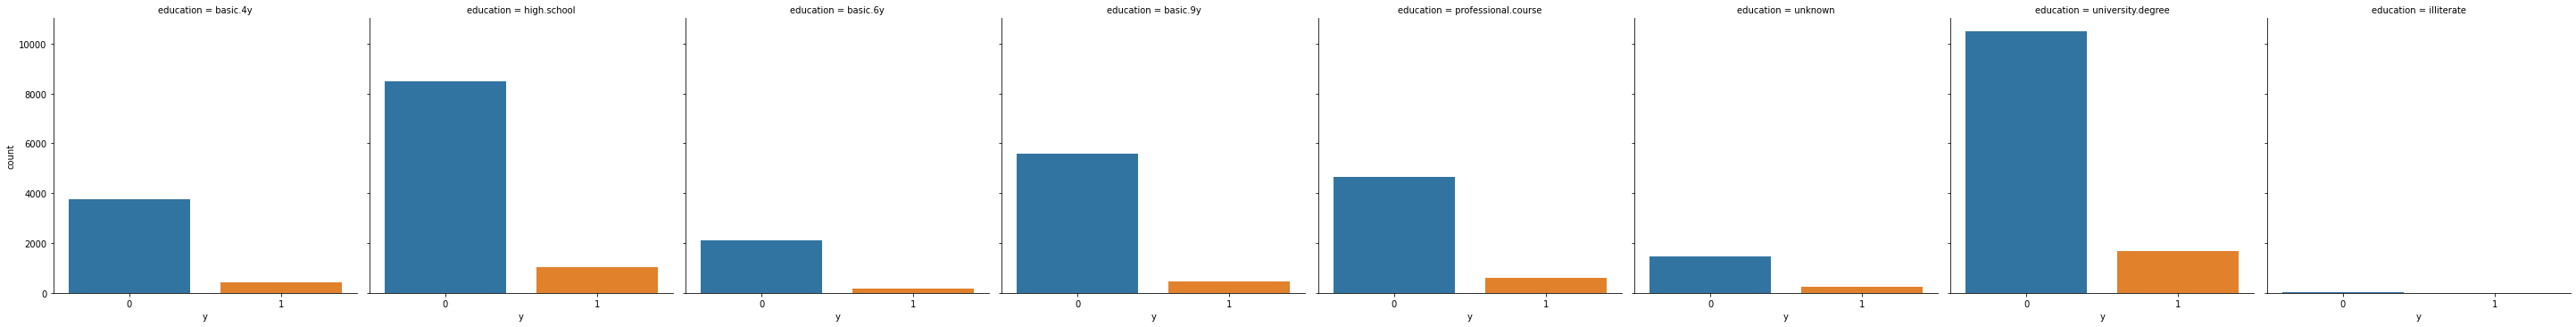

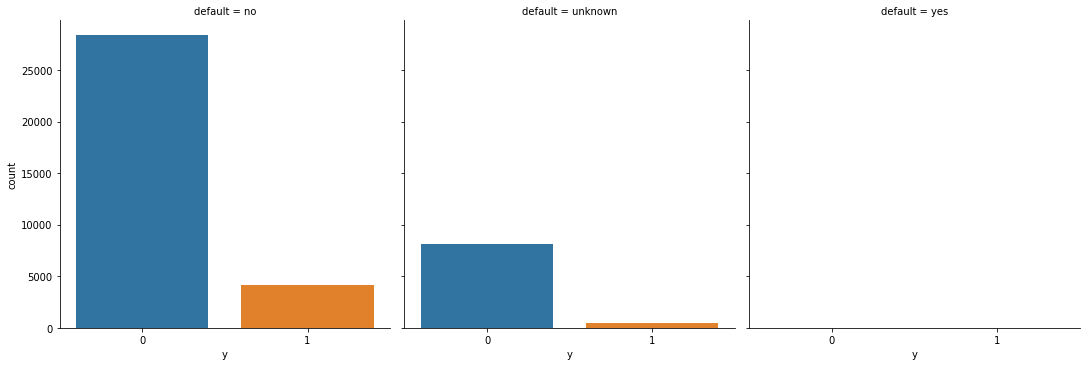

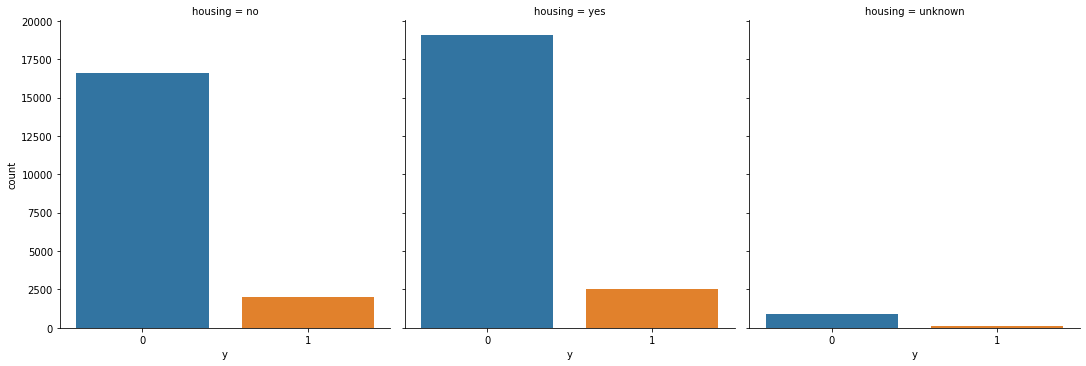

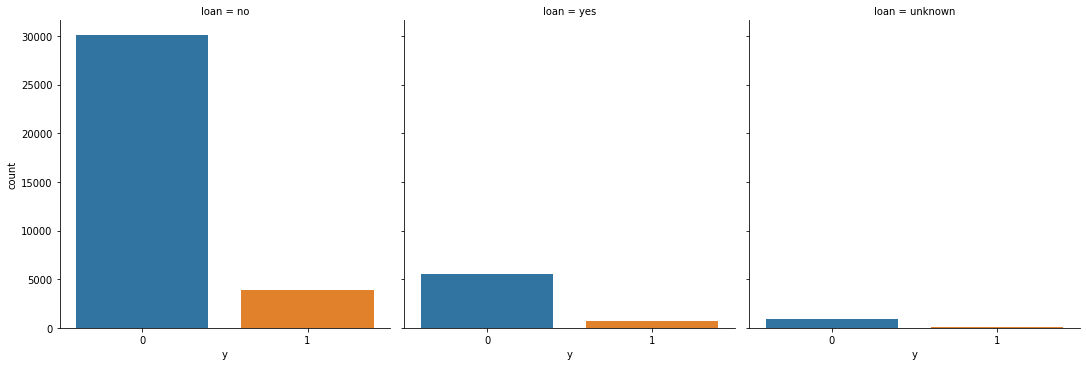

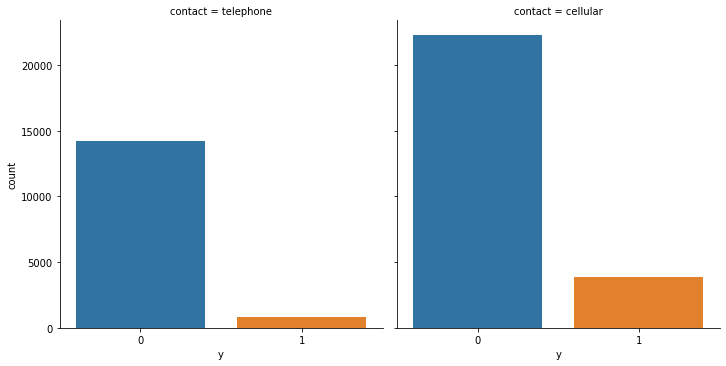

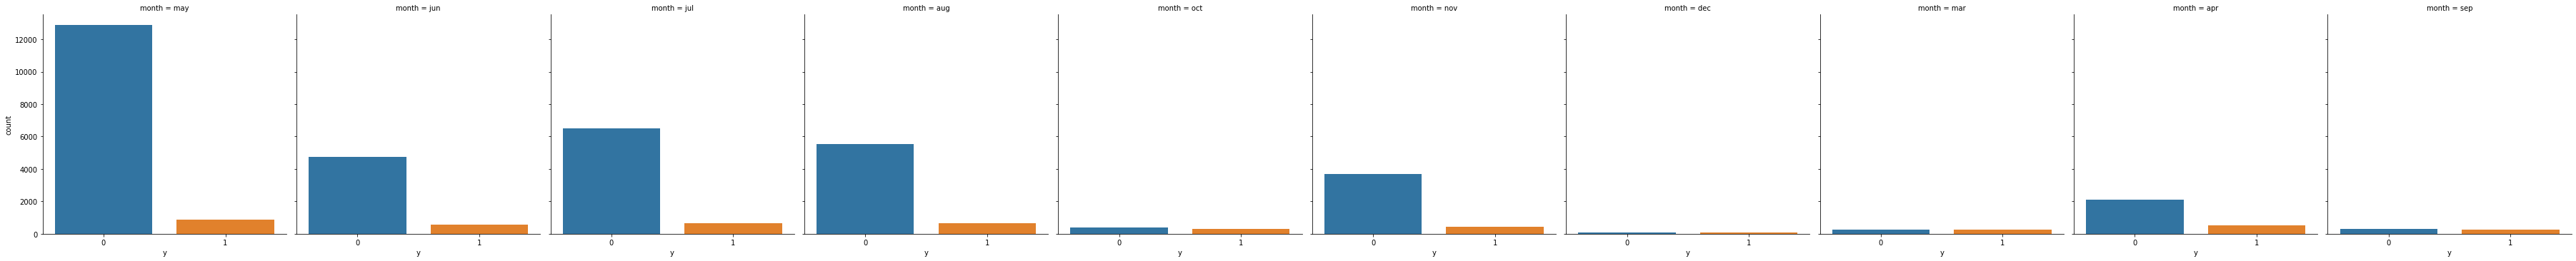

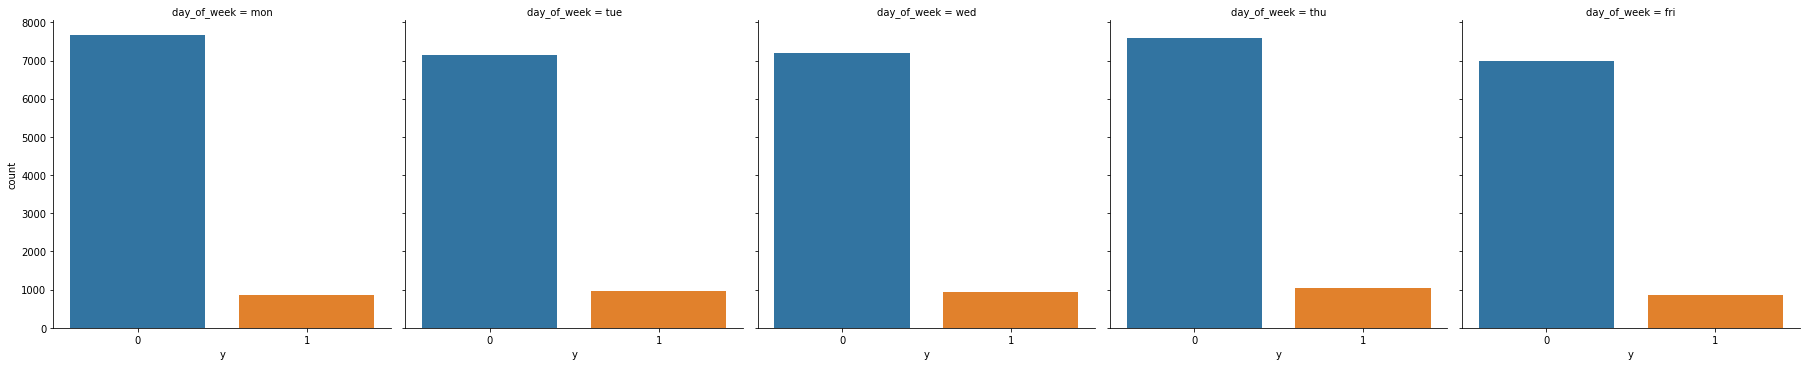

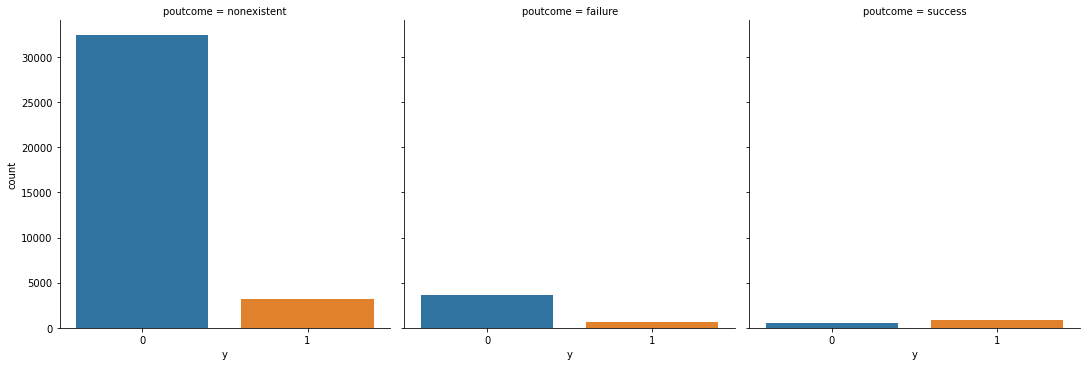

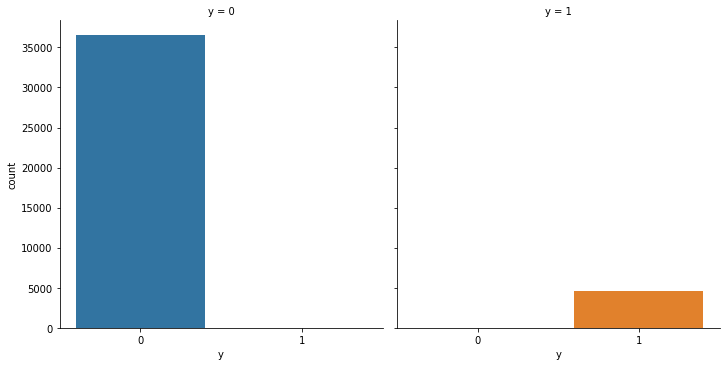

In [15]:
#Visualizing the Data

print(df.y.value_counts())
sns.countplot(x='y', data=df)

#Visualizing Categorical Variable

#print(df.job.value_counts())
#sns.countplot(y='job', data=df).set(xlabel='job')


plt.figure(figsize=(20,80),facecolor='white')
plotnumber=1
for CategoricalData in CategoricalDataCol:
    ax = plt.subplot(10,2,plotnumber)
    sns.countplot(y=CategoricalData, data=df).set_title(CategoricalData,fontsize = 15)
    plotnumber+=1
plt.show()


for CategoricalData in CategoricalDataCol:
    sns.catplot(x='y',col=CategoricalData,kind="count" ,data=df)
plt.show()


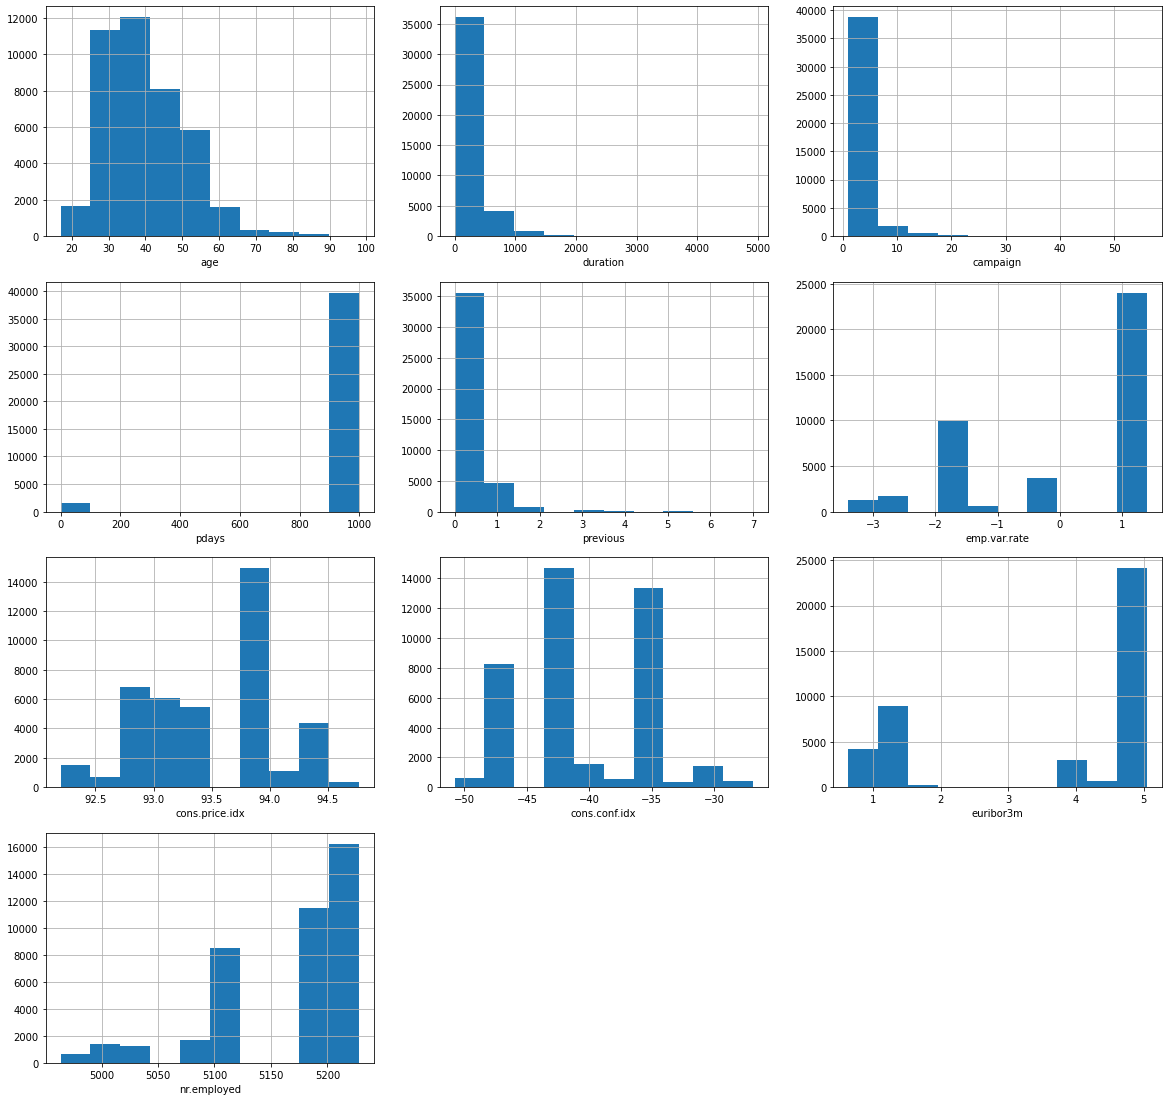

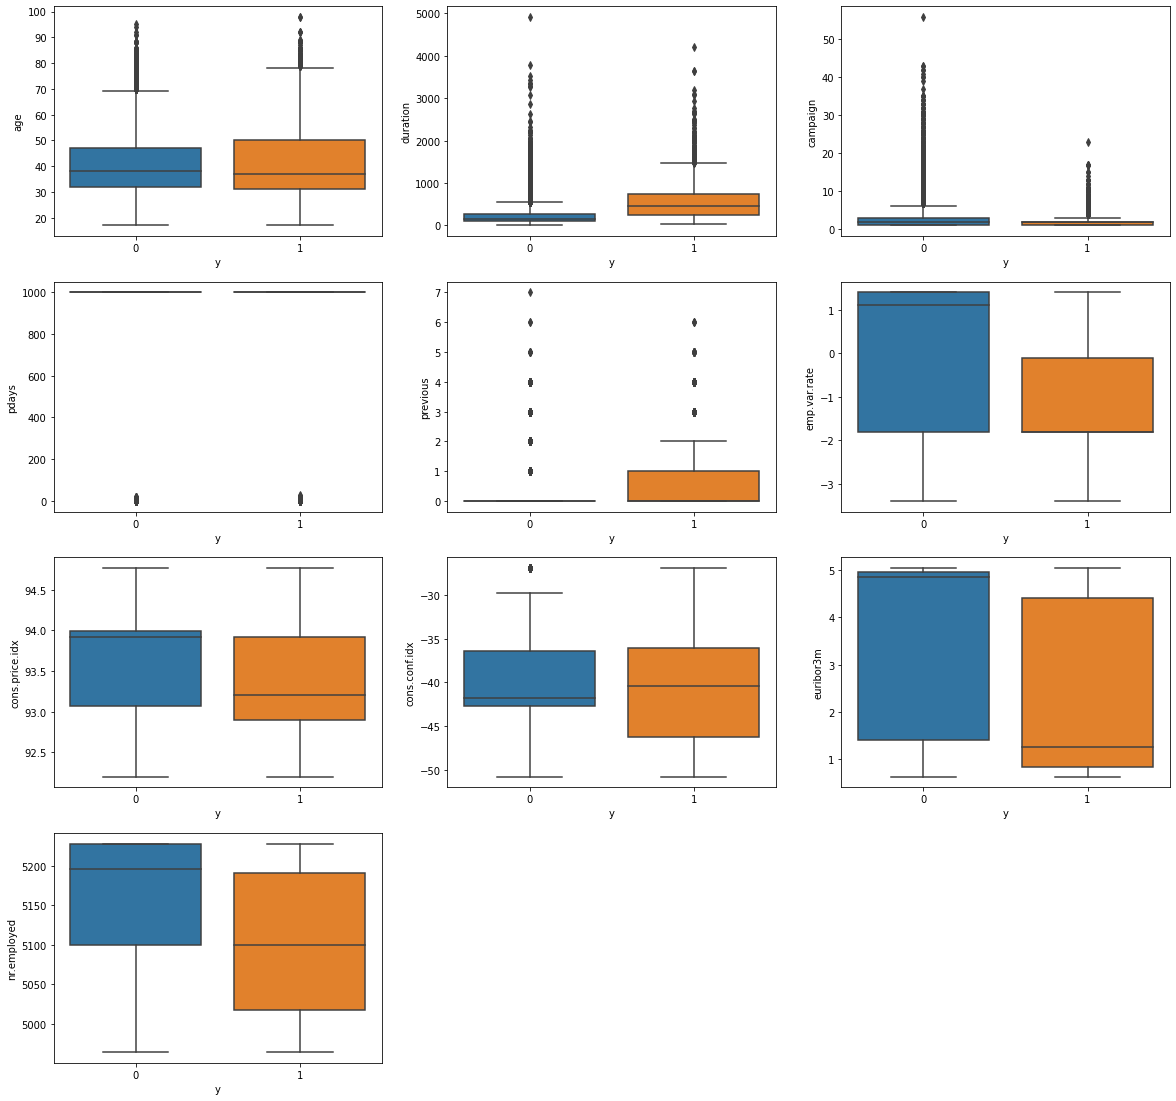

In [16]:
#Visualizing continous variables

#plt.hist(df.age)
#plt.xlabel('age')
#plt.grid(True)
#plt.show()


plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for ContinousData in ContinousDataCol:
    ax = plt.subplot(12,3,plotnumber)
    plt.hist(df[ContinousData])
    plt.xlabel(ContinousData)
    plt.grid(True)
#    sns.distplot(df[ContinousData])
    plotnumber+=1
plt.show()




plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for ContinousData in ContinousDataCol:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x='y',y=df[ContinousData], data=df)
    plotnumber+=1
plt.show()

In [17]:

#checking for null values

df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [18]:
#Encoding Categorical Data

y= df['y']
# df.drop(['y'], axis = 1, inplace = True)



ct = df.select_dtypes(include='object').columns
df = pd.concat([df,pd.get_dummies(df[ct])], axis=1)
df=df.drop(CategoricalDataCol,axis=1,errors='ignore')
df=df.drop(['y_0','y_1'],axis=1, errors='Ignore')
df['y']=y


print("okkk")
print(df.head())
df.info()


okkk
   age  duration  campaign  ...  poutcome_nonexistent  poutcome_success  y
0   56       261         1  ...                     1                 0  0
1   57       149         1  ...                     1                 0  0
2   37       226         1  ...                     1                 0  0
3   40       151         1  ...                     1                 0  0
4   56       307         1  ...                     1                 0  0

[5 rows x 64 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  i

In [19]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [20]:
#checking for null values

df.isnull().sum()

age                     0
duration                0
campaign                0
pdays                   0
previous                0
                       ..
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
y                       0
Length: 64, dtype: int64

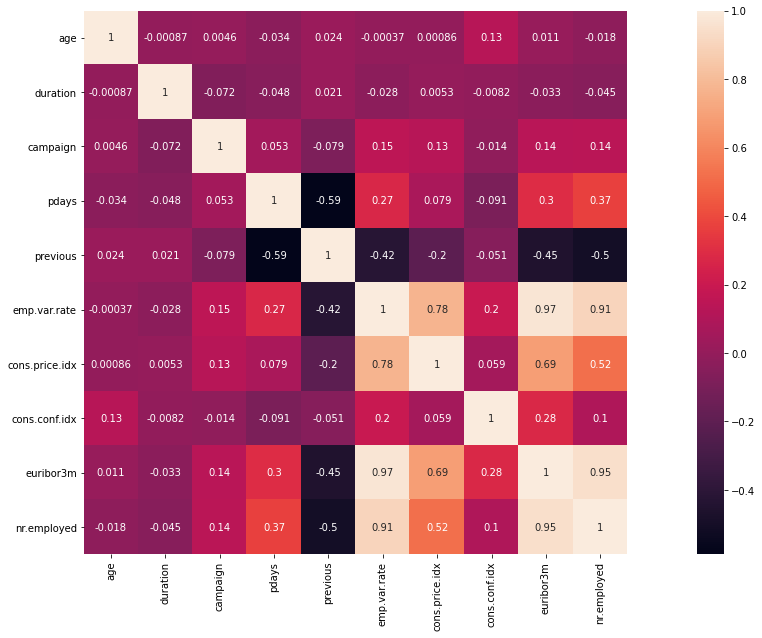

In [21]:
#correlation matrix
#print("correlation matrix","\n")
cor = df[ContinousDataCol].corr(method='pearson')
plt.figure(figsize=(25,10))
sns.heatmap(cor,vmax=1,square=True,annot=True)
plt.show()

In [22]:
#Data Normalization

min_max_scaler=prep.MinMaxScaler()
df_continous=df[ContinousDataCol]
df_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_continous),columns=df_continous.columns)
print(df_scaled.head())
df=pd.concat([df.drop(df_continous,axis=1),df_scaled], axis=1)
print(df.head())

        age  duration  campaign  ...  cons.conf.idx  euribor3m  nr.employed
0  0.481481  0.053070       0.0  ...        0.60251   0.957379     0.859735
1  0.493827  0.030297       0.0  ...        0.60251   0.957379     0.859735
2  0.246914  0.045954       0.0  ...        0.60251   0.957379     0.859735
3  0.283951  0.030704       0.0  ...        0.60251   0.957379     0.859735
4  0.481481  0.062424       0.0  ...        0.60251   0.957379     0.859735

[5 rows x 10 columns]
   job_admin.  job_blue-collar  ...  euribor3m  nr.employed
0           0                0  ...   0.957379     0.859735
1           0                0  ...   0.957379     0.859735
2           0                0  ...   0.957379     0.859735
3           1                0  ...   0.957379     0.859735
4           0                0  ...   0.957379     0.859735

[5 rows x 64 columns]


In [23]:
#Droping one of the variable which are correlated with more than 90%
df.drop(['euribor3m','emp.var.rate'],axis=1)
df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735


In [24]:
#splitting into train and test data sets

df['y']=df['y'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['y'],axis=1), df['y'], test_size = 0.2, random_state = 1000)


In [25]:
#Evaluating the current model
y_true = df.loc[Y_test.index,'y'].astype(int)
y_scores = np.array(initial_df.loc[Y_test.index, 'ModelPrediction'])
print(classification_report(y_true,y_scores>0.5))
print(roc_auc_score(y_true, y_scores))
confusion_matrix(y_true, y_scores>0.5)

              precision    recall  f1-score   support

           0       0.32      0.01      0.02      7320
           1       0.10      0.86      0.18       918

    accuracy                           0.10      8238
   macro avg       0.21      0.43      0.10      8238
weighted avg       0.29      0.10      0.03      8238

0.23592397645153992


array([[  62, 7258],
       [ 133,  785]])

(array([   7.,   73.,   97.,  133.,  283.,  211.,  220.,  717.,  960.,
        5537.]),
 array([0.2578541 , 0.33084339, 0.40383269, 0.47682198, 0.54981128,
        0.62280057, 0.69578987, 0.76877916, 0.84176845, 0.91475775,
        0.98774704]),
 <a list of 10 Patch objects>)

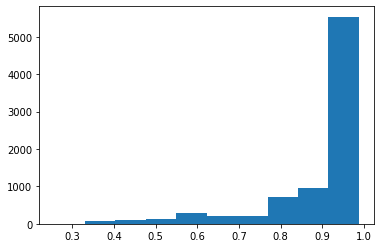

In [26]:
plt.hist(y_scores)